In [189]:
import pandas as pd
import keras
import matplotlib.pyplot as plt
import numpy as numpy
import seaborn as sns

In [190]:
# from google.colab import files
# files.upload()

In [191]:
df_source = pd.read_csv('train.csv')

In [192]:
df_source['Brand'] = df_source.Brand.astype('category')
df_source['Seller'] = df_source.Brand.astype('category')
df_source['full_category'] = df_source.Brand.astype('category')
df_source['Days with sales'] = df_source['Days with sales'].astype('float')
df_source['Rating'] = df_source['Rating'].str.replace(',','.').astype('float')

In [193]:
from sklearn.neighbors import LocalOutlierFactor
def outliers_det(X):
    LOF = LocalOutlierFactor(n_neighbors = 70)
    is_inl=LOF.fit_predict(X)
    return is_inl

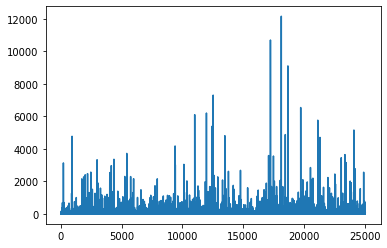

In [194]:
df_source.describe(include="all")
# sns.heatmap(df_source.corr())
df_source['Sales'].plot()

In [195]:
#Статистика по производителям
df_source.groupby(['Seller']).agg({'Sales': ['describe']}).head(10)

Sales                                                        \
               describe                                                         
                  count        mean         std    min     25%    50%     75%   
Seller                                                                          
&Atrendo            2.0    2.500000    2.121320    1.0    1.75    2.5    3.25   
&Health             1.0  190.000000         NaN  190.0  190.00  190.0  190.00   
01-Home             1.0  226.000000         NaN  226.0  226.00  226.0  226.00   
01-маркет           5.0   76.000000  127.068879    3.0   10.00   28.0   37.00   
0story              2.0    5.000000    5.656854    1.0    3.00    5.0    7.00   
100% ПРОВЕРЕНО      1.0    1.000000         NaN    1.0    1.00    1.0    1.00   
1000 Каталог       13.0    0.923077    2.019139    0.0    0.00    0.0    1.00   
1000 Мелочей       11.0    3.363636    5.679309    0.0    0.00    0.0    5.00   
101 VIP             4.0    2.750000    0.957427    2.0    2.00    2.5    3.25   
12.months           1.0  306.000000         NaN  306.0  306.00  306.0  306.00   

                       
                       
                  max  
Seller                 
&Atrendo          4.0  
&Health         190.0  
01-Home         226.0  
01-маркет       302.0  
0story            9.0  
100% ПРОВЕРЕНО    1.0  
1000 Каталог      7.0  
1000 Мелочей     14.0  
101 VIP           4.0  
12.months       306.0

In [196]:
df_source.groupby(['Brand']).agg({'Sales': ['describe']}).head(100)

Sales                                                \
                describe                                                 
                   count        mean         std    min     25%    50%   
Brand                                                                    
&Atrendo             2.0    2.500000    2.121320    1.0    1.75    2.5   
&Health              1.0  190.000000         NaN  190.0  190.00  190.0   
01-Home              1.0  226.000000         NaN  226.0  226.00  226.0   
01-маркет            5.0   76.000000  127.068879    3.0   10.00   28.0   
0story               2.0    5.000000    5.656854    1.0    3.00    5.0   
...                  ...         ...         ...    ...     ...    ...   
Acquaer              1.0    0.000000         NaN    0.0    0.00    0.0   
Actual For Life      5.0    3.800000    3.898718    1.0    1.00    1.0   
Adela                6.0    0.333333    0.516398    0.0    0.00    0.0   
Adler                1.0    0.000000         NaN    0.0    0.00    0.0   
Aenigma              2.0   25.000000   33.941125    1.0   13.00   25.0   

                                
                                
                    75%    max  
Brand                           
&Atrendo           3.25    4.0  
&Health          190.00  190.0  
01-Home          226.00  226.0  
01-маркет         37.00  302.0  
0story             7.00    9.0  
...                 ...    ...  
Acquaer            0.00    0.0  
Actual For Life    7.00    9.0  
Adela              0.75    1.0  
Adler              0.00    0.0  
Aenigma           37.00   49.0  

[100 rows x 8 columns]

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


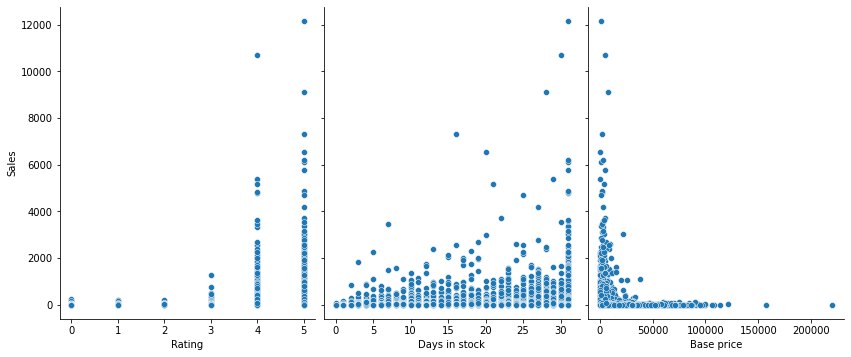

In [197]:
sns.pairplot(df_source, x_vars=["Rating","Days in stock","Base price"], y_vars="Sales", size=5, aspect=0.8)

## Нормализация и импутация данных

In [222]:
X, y = df_source.drop(columns=['Sales']), df_source.Sales

In [199]:
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 

In [217]:
numeric_columns = ['Rating', 'Base price', 'Days with sales', 'Comments', 'Base price', 'Basic Sale', 'Days in stock', 'Days with sales', 'Basic Sale Price', "Final price"]

nominal_columns = ['Brand', 'Seller']

In [218]:
nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='-')), # mb drop better
    ('enc',  OrdinalEncoder()),
    ('norm', StandardScaler())
])

In [219]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('norm', StandardScaler())
])

In [220]:
transformer_columns = ColumnTransformer(transformers=[
    ('nominal', nominal_transformer, nominal_columns),
    ('numeric', numeric_transformer, numeric_columns),
], remainder='drop')

In [223]:
X = pd.DataFrame(transformer_columns.fit_transform(X))
X.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.341473,-1.341473,-1.243083,4.651632,-0.530856,-0.203818,4.651632,-1.392824,0.237475,-0.530856,6.029225,6.375404
1,0.505230,0.505230,1.174328,-0.422646,-0.400845,-0.160103,-0.422646,0.792341,-1.355342,-0.400845,-0.420291,-0.419627


In [224]:
df1 = X.join(y)
df1.columns = df1.columns.astype('str')
dfWo = df1[outliers_det(df1) == 1]
X, y = dfWo.drop(columns=['Sales']), dfWo.Sales
X.shape

(24529, 12)

In [225]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=1999)

In [226]:
y_min, y_max = train_y.min(), train_y.max()
train_y = (train_y - y_min) / y_max
test_y = (test_y - y_min) / y_max

In [227]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [256]:
import keras.backend as K
def smape(y_pred, y_true):
    epsilon = 0.1
    summ = K.maximum(K.abs(y_true) + K.abs(y_pred) + epsilon, 0.5 + epsilon)
    smape = K.abs(y_pred - y_true) / summ * 2.0
    return smape

In [210]:
def estimate_model(pred, test):
  pred_val = pred * y_max + y_min
  test_val = test * y_max + y_min
  print("MSE: {}".format(mean_squared_error(pred_val, test_val)))
  print("MAE: {}".format(mean_absolute_error(pred_val, test_val))) 
  print("MAPE: {}".format(mean_absolute_percentage_error(pred_val, test_val)))
  print("SMAPE: {}".format(smape(pred_val, test_val))) 


## Линейная регрессия

In [261]:
from sklearn.linear_model import RidgeCV
slr = RidgeCV()
slr.fit(train_X, train_y)
estimate_model(slr.predict(test_X), test_y)

MSE: 7107.492332208343
MAE: 32.00826109066463
MAPE: 1.4802049865916789
SMAPE: [0.97969509 1.97013953 1.98872918 ... 1.00422637 1.9897361  1.99008831]


AttributeError: ignored

## Деревья решений регрессор

In [258]:
from sklearn.tree import DecisionTreeRegressor
tr = DecisionTreeRegressor(max_depth=11)
tr = tr.fit(train_X, train_y)
estimate_model(tr.predict(test_X), test_y)

MSE: 9004.225499333515
MAE: 19.130955546878035
MAPE: 0.35119892459702085
SMAPE: [1.27128095 0.04219332 0.         ... 0.15597275 0.         0.        ]


## GBM

In [259]:
from lightgbm import LGBMRegressor
lgregr = LGBMRegressor(n_estimators=4)
lgregr.fit(train_X, train_y)
estimate_model(lgregr.predict(test_X), test_y)

MSE: 9329.719967697694
MAE: 32.70516924120665
MAPE: 0.8434316829417795
SMAPE: [0.49696821 1.20427613 1.99151141 ... 1.07725649 1.99151141 1.99151141]


## Случайный лес регрессор

In [260]:
from sklearn.ensemble import RandomForestRegressor
frst = RandomForestRegressor(n_estimators=61, max_depth=20, random_state=700)
frst = frst.fit(train_X, train_y)
estimate_model(frst.predict(test_X), test_y)

MSE: 5158.861102745472
MAE: 15.899542684114548
MAPE: 0.2978700106354167
SMAPE: [0.88543249 0.11131726 0.         ... 0.033569   0.         0.        ]


## Нейронные сети

In [ ]:
from keras import models
from keras import layers

In [ ]:
def build_model(input_data_shape):
    model = models.Sequential()
    model.add(layers.Dense(16, activation='sigmoid',
                          input_shape=(input_data_shape, ),
                          kernel_initializer='normal'
))
    model.add(layers.Dense(8, activation='sigmoid',
                               kernel_initializer='normal'
    ))
    # model.add(layers.Dense(16, activation='relu',
    #                            kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.1, seed=None) 
    # ))
    # model.add(layers.Dense(8, activation='relu',
    #                            kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.1, seed=None) 
    # ))
    # model.add(layers.Dense(4, activation='relu',
    #                            kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.1, seed=None) 
    # ))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                 loss='mae',
                 metrics=[keras.metrics.MeanAbsoluteError()])
    return model
model = build_model(train_X.values.shape[1])
model.fit(train_X, train_y,
         batch_size=50, epochs=300, verbose=1,
         validation_data=(test_X, test_y))

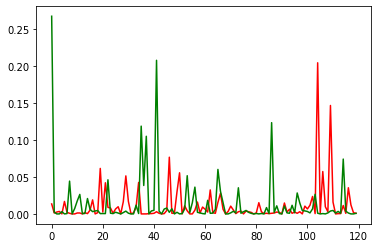

In [231]:
import matplotlib.pyplot as plt
predict_y = pd.DataFrame(frst.predict(test_X))

xa = numpy.arange(0, 120, 1)

plt.plot(xa, test_y.sort_index()[:120], color="red")
plt.plot(predict_y.sort_index()[:120], color="green")

In [232]:
estimate_model(predict_y, test_y)

MSE: 5158.861102745472
MAE: 15.899542684114548
MAPE: 0.2978700106354167
SMAPE: 0        0.0
8        0.0
12       0.0
16       0.0
18       0.0
        ... 
25047    0.0
25048    0.0
25051    0.0
25054    0.0
25057    0.0
Length: 4907, dtype: float64


In [233]:
X_result_raw = pd.read_csv('test.csv')

In [234]:
X_result_raw['Brand'] = X_result_raw.Brand.astype('category')
X_result_raw['Seller'] = X_result_raw.Brand.astype('category')
X_result_raw['full_category'] = X_result_raw.Brand.astype('category')
X_result_raw['Days with sales'] = X_result_raw['Days with sales'].astype('float')
X_result_raw['Rating'] = X_result_raw['Rating'].str.replace(',','.').astype('float')

In [235]:
X_result = pd.DataFrame(transformer_columns.fit_transform(X_result_raw))
X_result.shape

(10741, 12)

In [236]:
y_predict = frst.predict(X_result)
df_result_y = pd.DataFrame(y_predict, columns=["Expected"])
df_result_y['Id'] = df_result_y.index
df_result_y.reindex(columns=['Id', 'Expected'])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


,Id,Expected
0,0,0.014831
1,1,0.014697
2,2,0.019259
3,3,0.000000
4,4,0.002554
...,...,...
10736,10736,0.001373
10737,10737,0.011277
10738,10738,0.053901
10739,10739,0.000910


In [237]:
df_result_y['Expected'] = df_result_y['Expected'] * y_max + y_min
df_result_y['Expected']

0         35.150553
1         34.831148
2         45.643082
3          0.000000
4          6.053667
            ...    
10736      3.254109
10737     26.725567
10738    127.744262
10739      2.155974
10740     14.556448
Name: Expected, Length: 10741, dtype: float64

In [238]:
df_result_y.to_csv('result.csv', index=False)

In [239]:
!pip install keras-tuner
from keras_tuner import RandomSearch, BayesianOptimization, Objective

In [262]:
def build_model(hp):
    activatiom_choice = hp.Choice('activation', values=['sigmoid', 'relu', 'elu'])
    model = models.Sequential()
    model.add(layers.Dense(
        hp.Int('input_layer', min_value=5, max_value=100, step=5),
        activation=activatiom_choice,
        input_shape=(X.shape[1], )
    ))
    for i in range(hp.Int('hidden', min_value=0, max_value=5)):
      model.add(layers.Dense(
        hp.Int('{}_layer'.format(i), min_value=5, max_value=100, step=5),
        activation=activatiom_choice
    ))
    model.add(layers.Dense(1, activation='sigmoid'))
        
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                 loss='mse',
                 metrics=[keras.metrics.MeanAbsoluteError()])
    return model

In [263]:
tuner = BayesianOptimization(
    build_model,
    objective=Objective("val_mean_absolute_error", direction="min"),
    max_trials=100,
    overwrite=True,
    directory='test'
)

In [ ]:
tuner.search(train_X, train_y,
             batch_size=500,
             epochs=300,
             validation_split=0.2,
             verbose=1
            )

Trial 4 Complete [00h 00m 45s]
val_mean_absolute_error: 0.00930792186409235

Best val_mean_absolute_error So Far: 0.00834803655743599
Total elapsed time: 00h 05m 35s

Search: Running Trial #5

Value             |Best Value So Far |Hyperparameter
sigmoid           |relu              |activation
100               |85                |input_layer
4                 |2                 |hidden
5                 |5                 |0_layer
5                 |5                 |1_layer
100               |None              |2_layer
15                |None              |3_layer

Epoch 1/300
32/32 [==============================] - 1s 15ms/step - loss: 0.0512 - mean_absolute_error: 0.1593 - val_loss: 0.0063 - val_mean_absolute_error: 0.0641
Epoch 2/300
32/32 [==============================] - 0s 9ms/step - loss: 0.0045 - mean_absolute_error: 0.0533 - val_loss: 0.0048 - val_mean_absolute_error: 0.0472
Epoch 3/300
32/32 [==============================] - 0s 9ms/step - loss: 0.0036 - mean_absolute_er